In [154]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

MACD Line = 12 Period EMA - 26 Period EMA


The strategy is simple,if MACD line crosses above signal line then buy the stock
if macd crosses bellow the signal line, sell the stock


In [177]:
df=yf.download("^GSPC",start="2015-01-01",progress=False)

In [178]:
def MACD (df):
    df["EMA12"]=df["Adj Close"].ewm(span=12).mean()
    df["EMA26"]=df["Adj Close"].ewm(span=26).mean()
    df["MACD"]=df["EMA12"]-df["EMA26"]
    df["signal_line"]=df["MACD"].ewm(span=9).mean()
    print("Function Working")
MACD(df)

Function Working


In [179]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal_line
Date,,,,,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000,2058.199951,2058.199951,0.000000,0.000000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000,2037.822454,2038.666492,-0.844038,-0.468910
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000,2024.079019,2025.711739,-1.632720,-0.945881
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000,2024.653839,2025.764376,-1.110536,-1.001659
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000,2034.838666,2034.200008,0.638658,-0.513702
...,...,...,...,...,...,...,...,...,...,...
2021-07-19,4296.399902,4296.399902,4233.129883,4258.490234,4258.490234,4155790000,4327.237073,4298.958111,28.278962,36.634015
2021-07-20,4265.109863,4336.839844,4262.049805,4323.060059,4323.060059,3634190000,4326.594455,4300.743440,25.851015,34.477415
2021-07-21,4331.129883,4359.700195,4331.129883,4358.689941,4358.689941,3078550000,4331.532222,4305.035774,26.496449,32.881222


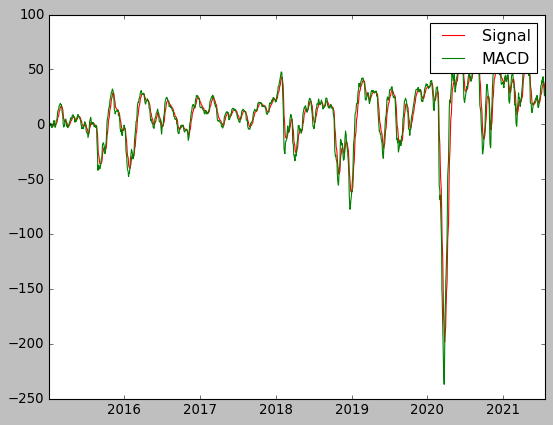

In [180]:
plt.plot(df["signal_line"],label="Signal", color="red")
plt.plot(df["MACD"],label="MACD", color="green")
plt.legend()
plt.rcParams['lines.linewidth'] = 1
plt.style.use("classic")

In [181]:
Buy, Sell =[],[]
for i in range(2,len(df)):
    if df["MACD"].iloc[i]> df["signal_line"].iloc[i] and df["MACD"].iloc[i-1]<df["signal_line"].iloc[i-1]:
        Buy.append(i) # getting the row number of buying condition
    elif  df["MACD"].iloc[i]< df["signal_line"].iloc[i] and df["MACD"].iloc[i-1]>df["signal_line"].iloc[i-1]:
        Sell.append(i)

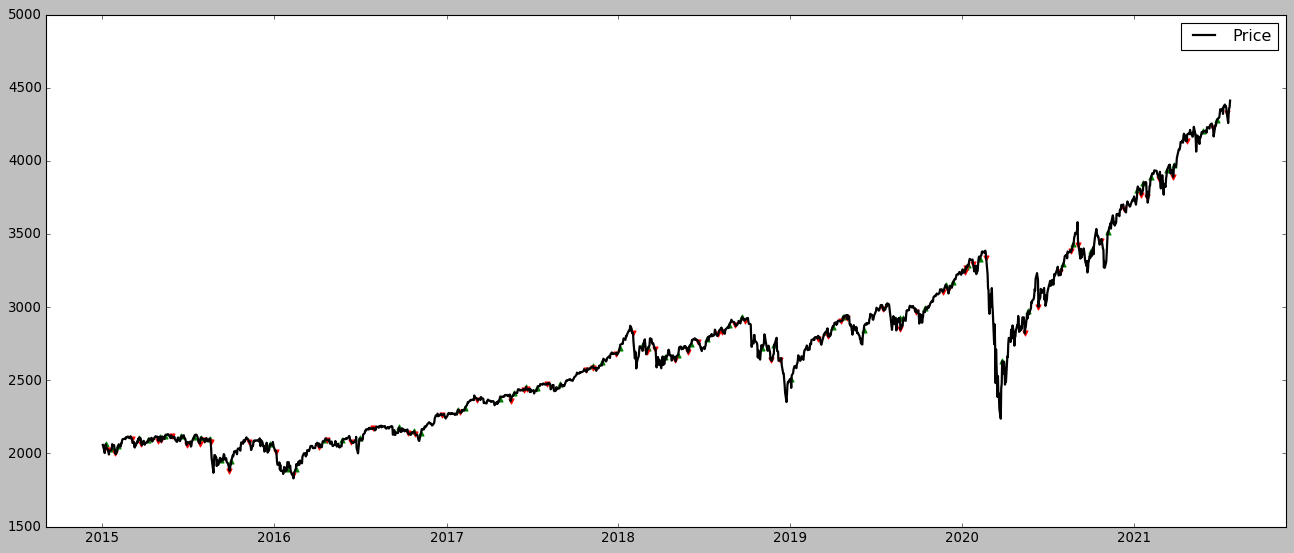

In [182]:
plt.figure(figsize=(20,8))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]["Adj Close"], marker="^", color="green")
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]["Adj Close"], marker="v", color="red")
plt.plot(df["Adj Close"], label="Price", color="k",linewidth =2)
plt.legend()
plt.show()

In [183]:
# let's be real, if the market are closed you can't send orders, so we are adjusting the realbuys and realsells to the moment that we can do that
Realbuys = [i+1 for i in Buy] # one day after the strategy alerts
Realsells=[i+1 for i in Sell]

In [184]:
Buyprices=df["Open"].iloc[Realbuys]
Sellprices=df["Open"].iloc[Realsells]

In [185]:
# Okay but let's consider that we cant sell stocks before we have then and doesn't have too munch sense analyse an open position
if Sellprices.index[0]<Buyprices.index[0]:
    Sellprices=Sellprices.drop(Sellprices.index[0])
elif Buyprices.index[-1]>Sellprices.index[-1]:
    Buyprices=Buyprices.drop(Buyprices.index[0])


Final Value: $2087.44


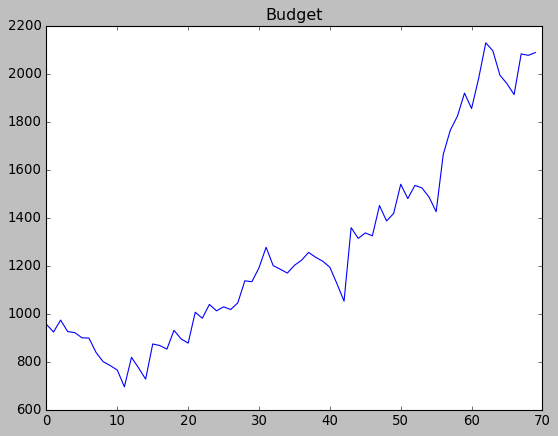

In [186]:
profits=[]
cash=[]
cashreal=[]
budget=1000
for x in range(len(Sellprices)):
    profits.append((Sellprices[x]-Buyprices[x])/Buyprices[x])
    cash.append(Sellprices[x]-Buyprices[x])
for a in range (len(cash)):
    if a==0:
        cashreal.append(budget+cash[a])# budget inicial
    if a!=0:
        cashreal.append(cash[a]+cashreal[a-1])
s=pd.Series(cashreal)
s.to_frame()
s.plot(title="Budget")
print(f"Final Value: ${cashreal[-1]:.2f}")


In [192]:
# Final Report
print(f"Final Value: ${cashreal[-1]:.2f}")
print(f"Percentage Gain in Period: {(cashreal[-1]/budget-1)*100:.2f}%")
print(f"Mean Profit: {statistics.mean(profits)*100:.2f}%")
b_h=(df["Adj Close"][-1]-df["Adj Close"][0])/df["Adj Close"][0]
print(f"Buy & Hold Period: {b_h*100:.2f}%")
print(f"Maximum Drawdown: $ {min(cashreal)-budget:.2f} ")
print(f"Maximum Drawdown: $ {(min(cashreal)-budget)/budget*100:.2f}% ")

Final Value: $2087.44
Percentage Gain in Period: 108.74%
Mean Profit: 0.58%
Buy & Hold Period: 114.35%
Maximum Drawdown: $ -305.27 
Maximum Drawdown: $ -30.53% 
